# Another example of a polar projection plot

This time with marker and text transform

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
from matplotlib.patches import Ellipse

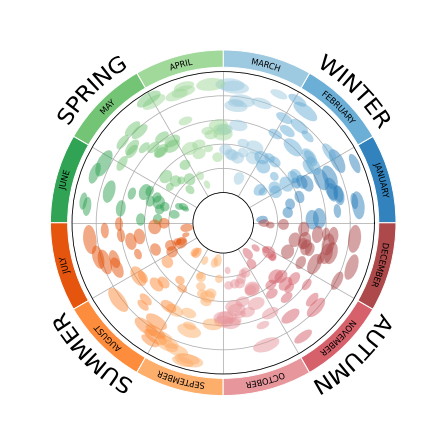

In [4]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1], aspect=1)


size = 0.1
vals = np.ones(12)
np.random.seed(123)

# A nice set of colors for seasons
cmap20c = plt.get_cmap("tab20c")
cmap20b = plt.get_cmap("tab20b")
colors = [
    cmap20c(0),
    cmap20c(1),
    cmap20c(2),  # Winter
    cmap20c(10),
    cmap20c(9),
    cmap20c(8),  # Spring
    cmap20c(4),
    cmap20c(5),
    cmap20c(6),  # Summer
    cmap20b(15),
    cmap20b(14),
    cmap20b(13),
]  # Autumn

# Simple pie
ax.pie(np.ones(12), radius=1, colors=colors, wedgeprops=dict(width=size, edgecolor="w"))


# Rotated and transformed label
def label(text, angle, radius=1, scale=0.005):
    path = TextPath((0, 0), text, size=10)
    path.vertices.flags.writeable = True
    V = path.vertices
    xmin, xmax = V[:, 0].min(), V[:, 0].max()
    ymin, ymax = V[:, 1].min(), V[:, 1].max()
    V -= (xmin + xmax) / 2, (ymin + ymax) / 2
    V *= scale
    for i in range(len(V)):
        a = angle - V[i, 0]
        V[i, 0] = (radius + V[i, 1]) * np.cos(a)
        V[i, 1] = (radius + V[i, 1]) * np.sin(a)
    patch = PathPatch(path, facecolor="k", linewidth=0)
    ax.add_artist(patch)


# This could be made through a list but it is easier to red this way
label("JANUARY", 0.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("FEBRUARY", 1.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("MARCH", 2.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("WINTER", 1.5 * 2 * np.pi / 12, 1 + size, 0.0125)

label("APRIL", 3.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("MAY", 4.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("JUNE", 5.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("SPRING", 4.5 * 2 * np.pi / 12, 1 + size, 0.0125)

label("JULY", 6.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("AUGUST", 7.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("SEPTEMBER", 8.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("SUMMER", 7.5 * 2 * np.pi / 12, 1 + size, 0.0125)

label("OCTOBER", 9.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("NOVEMBER", 10.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("DECEMBER", 11.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("AUTUMN", 10.5 * 2 * np.pi / 12, 1 + size, 0.0125)


# Add a polar projection on top of the previous one
ax = fig.add_axes([0.15, 0.15, 0.7, 0.7], projection="polar")

# Some ellipses that will enforce polar projection
for i in range(250):
    p = np.random.uniform(0, 2 * np.pi), np.random.uniform(0.05, 0.95)
    w = h = 0.01 + 0.05 * np.random.uniform(1, 2)
    color = colors[int(np.floor((p[0] / (2 * np.pi)) * 12))]
    ellipse = Ellipse(
        p,
        width=2 * w,
        height=h,
        zorder=10,
        facecolor=color,
        edgecolor="none",
        alpha=0.5,
    )
    ax.add_artist(ellipse)
ax.set_xlim(0, 2 * np.pi)
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax.set_xticklabels([])
ax.set_ylim(0, 1)
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_yticklabels([])
ax.set_rorigin(-0.25)